## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
pd.set_option('use_inf_as_na', True)   # turn the infinity as NA
from collections import Counter

## Loading the Data Set (you need to put in the file where you have stored the data)

In [2]:
raw_data = pd.read_pickle("dataset.pkl")

## Restricting to Companies with Market Cap > 1 Billion

In [3]:
data = raw_data[raw_data['market_cap'] > 1000.0]       # market_cap is measured in millions

## The Total Number of Companies w/ Market Cap > 1 Billion that appear during our time horizon

In [4]:
len(data.index.get_level_values(1).unique())

4076

## Filling in Missing Values

In [5]:
data.fillna(0.0,inplace=True)

c:\users\gulishana\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


## <font color='red'> Homework Problem 1: </font>

#### <font color='red'> Insert a column in the data set where the entries are： (1) 1 if the stock outperforms SPY in the earnings period; (2) -1 if it underperforms or has the same return </font>

#### The function below turns the return differences into labels

In [6]:
# Here is what you need to change for the homework1 : make new labels     
# then run the whole code file & find out how the strategy works

def f(x):
    if x > 0:
        return 1          # labels
    else:
        return -1

#### Applying the function to the column of relative returns and making a column of labels

In [7]:
data['rel_performance'] = data['pred_rel_return'].apply(f)

c:\users\gulishana\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### This is the column of labels

In [8]:
data['rel_performance']

date        ticker
2000-02-09  CSCO     -1
            ROP       1
2000-02-10  CMOS      1
2000-02-11  DELL      1
2000-02-15  VAL       1
2000-02-16  AMAT      1
            ANF      -1
            DE        1
            EV        1
            NAV      -1
            NTAP     -1
            NVDA      1
            WMT       1
            ZLC       1
2000-02-17  ADI       1
            ADIC     -1
            CPB      -1
            TWE       1
2000-02-18  A        -1
            ADCT      1
            AGIL     -1
            BRCD      1
            CIEN      1
            HRL      -1
            JWN       1
            NOVL     -1
            SCMR     -1
            SNPS      1
2000-02-23  BEAS     -1
            DG        1
                     ..
2018-12-18  RHT      -1
2018-12-19  ABM      -1
            AIR      -1
            DRI      -1
            FDS      -1
            FDX      -1
            JBL      -1
            MU       -1
            NAV      -1
            SCS      

### Make date the index, remember that the date is the first business day after Earnings Release

In [9]:
data.reset_index(inplace=True)    # make original index as columns
data.set_index('date', inplace=True)    # set "date" as index
# inplace=True: don't use too much memory by not making copies

### This what the data set looks like now

In [10]:
data

,ticker,actq,apq,atq,ceqq,cheq,cogsq,csh12q,cshfdq,cshiq,...,sector_code_817.0,sector_code_822.0,sector_code_823.0,sector_code_825.0,sector_code_830.0,sector_code_835.0,sector_code_840.0,sector_code_845.0,sector_code_850.0,rel_performance
date,,,,,,,,,,,,,,,,,,,,,
2000-02-09,CSCO,7722.000,482.000,21391.000,16523.000,3968.000,1422.000,3374.1250,3648.000,3445.000,...,0,0,0,0,0,0,0,0,0,-1
2000-02-09,ROP,172.725,19.662,474.649,239.432,3.198,47.634,30.2688,31.217,0.000,...,0,0,0,0,0,0,0,0,0,1
2000-02-10,CMOS,240.767,27.044,376.536,209.411,68.625,43.023,21.4360,23.753,0.000,...,0,0,0,0,0,0,0,0,0,1
2000-02-11,DELL,7681.000,3538.000,11471.000,5308.000,4132.000,5452.000,2536.0000,2731.000,2575.000,...,0,0,0,0,0,0,0,0,0,1
2000-02-15,VAL,507.082,139.497,1094.080,402.382,27.605,221.366,43.1858,43.687,53.321,...,0,0,0,0,0,0,0,0,0,1
2000-02-16,AMAT,5462.528,1343.693,7057.999,4756.546,3004.177,777.332,389.5113,409.817,386.487,...,0,0,0,0,0,0,0,0,0,1
2000-02-16,ANF,300.217,18.714,458.166,311.094,193.509,170.010,102.8710,105.703,104.104,...,0,0,0,0,0,0,0,0,0,-1
2000-02-16,DE,0.000,2327.700,18144.400,4094.800,297.500,1714.500,233.4500,236.300,265.879,...,0,0,0,0,0,0,0,0,0,1
2000-02-16,EV,112.154,14.347,380.413,216.571,100.008,56.495,35.8978,36.927,35.526,...,0,0,1,0,0,0,0,0,0,1


#### We use a training period of 3 years = 12 quarters, and choose two random 3 year time spans as training and test sets

In [11]:
df_1 = data.loc['2008-01-01':'2011-01-01']
df_2 = data.loc['2015-04-01':'2018-04-01']

#### The validation set and test set are the quarters starting 1 quarter after the end of the training periods

In [12]:
df_valid = data.loc['2012-04-01':'2012-07-01']   # 应该改成 2011
df_test = data.loc['2018-07-01':'2018-10-01']

#### Next we delete the columns that are not needed for training

In [13]:
train_1 = df_1.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)
train_2 = df_2.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)

valid = df_valid.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)
test = df_test.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)

#### We take out the actual  earnings period stock returns in the training and test sets

In [14]:
train_1_stock_returns = df_1['next_period_return']
valid_stock_returns = df_valid['next_period_return']
train_2_stock_returns = df_2['next_period_return']
test_stock_returns = df_test['next_period_return']

#### and the labels for the training and validation and test data. We turn them into arrays by applying the .values method

In [15]:
y_1 = df_1['rel_performance']
y_2 = df_2['rel_performance']
y_valid = df_valid['rel_performance']
y_test = df_test['rel_performance']

In [16]:
y_1 = y_1.values
y_2 = y_2.values
y_valid = y_valid.values
y_test = y_test.values

## Number of Features

In [17]:
len(train_1.columns)

725

## Importing the Tree Classifier and some metrics from sklearn

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

## Instantiating the classifiers with hyper-parameters

In [19]:
t_clf = DecisionTreeClassifier(min_samples_leaf =600,max_depth=8,random_state=123)
# min_samples_leaf: minimum samples in each leaf we allow for
# if not defined, tree will run all the possible ones to the best fit for the training data (-> overfitting)

# max_depth also helps to restrict the overfitting

# if only use random_state, it will overfit, gives score=1 in the training data

## Now we can fit the tree with the training data

In [20]:
t_clf.fit(train_1,y_1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=600, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

### and see how well it fits the training data

In [21]:
t_clf.score(train_1,y_1)    # accurary=1 is the perfect fit   (opposite to error rate)

0.5856114191040591

### and predicts the validation data (not very well)

In [22]:
t_clf.score(valid,y_valid)

0.4679925419515227

### The predicted labels on the validation set and their counts

In [23]:
pred_valid = t_clf.predict(valid)

In [24]:
Counter(pred_valid)

Counter({1: 1286, -1: 323})

### Visualizing the tree

In [25]:
import graphviz
from sklearn import tree

In [26]:
# tell Python where the Graphviz bin folder is (the PATH)
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files/Python related/graphviz-2.38/bin/'

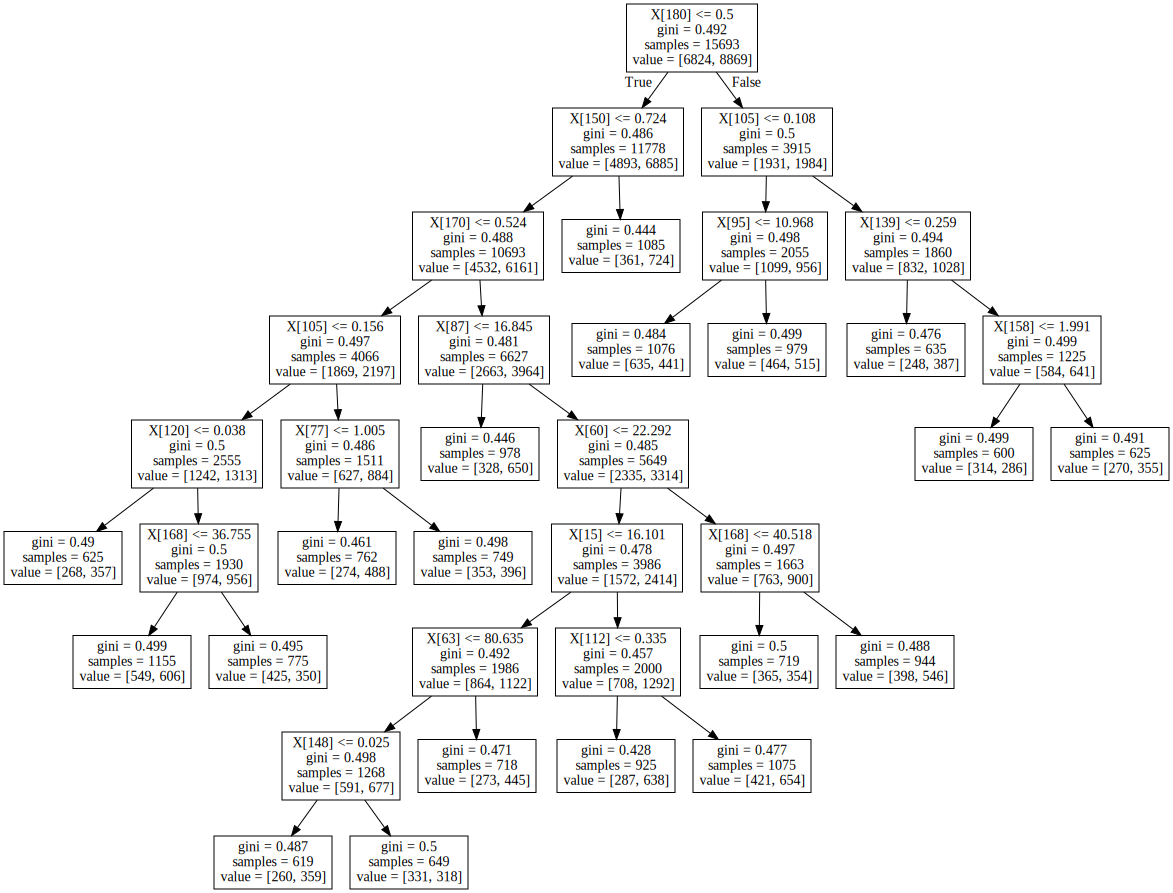

In [27]:
dot_data = tree.export_graphviz(t_clf,out_file=None)
graph = graphviz.Source(dot_data)
graph.render('Tree_1')
graph

## Now we are going to cut the features by looking at their importance in the tree. The visualization of the tree shows that only a few of the features are actually used

In [28]:
def tree_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'feat_imp':m.feature_importances_}
                       ).sort_values('feat_imp', ascending=False)

def plot_fi(fi): return fi.plot('cols', 'feat_imp', 'barh', figsize=(12,7), legend=False)

In [29]:
fi = tree_feat_importance(t_clf,train_1)

In [30]:
fi

,cols,feat_imp
180,fqtr_2,0.181658
105,cf_yield,0.125424
170,at_turnq,0.086071
150,lt_debtq,0.083528
95,evmq,0.070698
15,dpq,0.066861
168,cash_conversionq,0.056154
87,prccq,0.051771
60,xintq,0.049759
77,oepsxy,0.048155


## We are only going to use the features that have positive feature importance i.e. occur in the tree

In [31]:
features = fi[(fi['feat_imp'] > 0.00)]

### Feature importance spectrum

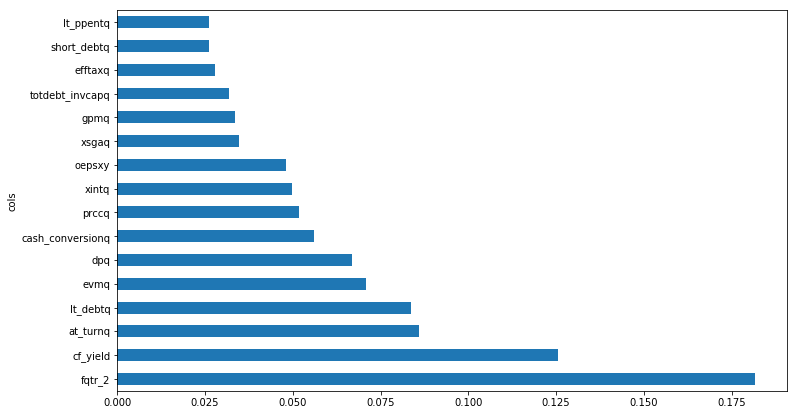

In [32]:
plot_fi(features);

#### We are left with a much smaller set of features

In [33]:
len(features['cols'].values)

16

### We cut down the training and validation data sets to only include the relevant features and retrain the tree on the reduced data set

In [34]:
train_1 = train_1[features['cols'].values]

In [35]:
t_clf.fit(train_1,y_1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=600, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [36]:
t_clf.score(train_1,y_1)

0.5856114191040591

In [37]:
valid = valid[features['cols'].values]

In [38]:
t_clf.score(valid,y_valid)

0.4679925419515227

In [39]:
pred_valid = t_clf.predict(valid)

In [40]:
confusion_matrix(y_valid,pred_valid)

array([[172, 705],
       [151, 581]], dtype=int64)

## We are really only interested in how much return the strategy generates over the validation period

In [41]:
(pred_valid * df_valid['next_period_return']).sum()

-23.203392999999974

### We define the Profit Importance of a feature by how much removing the feature affects the profit (positivly or negatively). By scrambling the feature column we get a column which should have to effect on the profit and we compute the profit with the scrambled column. Because the scrambling is random we use 100 random permutations and take the average.

In [42]:
def profit_importance(t,df,rets):
#     np.random.seed(123)
    profit = []
    for col in df.columns:
            X = df.copy()   # make a new copy of the dataframe
            X[col] = np.random.permutation(df[col].values)
            prediction = t.predict(X)
            profit.append((prediction * rets).sum())
    return profit

In [43]:
def tree_profit_importance(m, df,rets):
    return pd.DataFrame({'cols':df.columns, 'pi_imp':profit_importance(m,df,rets)}
                       ).sort_values('pi_imp', ascending=True)

In [44]:
pi = tree_profit_importance(t_clf,valid,df_valid['next_period_return'])
pi

,cols,pi_imp
4,evmq,-24.951047
9,oepsxy,-23.203393
11,gpmq,-23.203393
12,totdebt_invcapq,-23.200289
15,lt_ppentq,-23.174105
3,lt_debtq,-21.931857
7,prccq,-21.504781
13,efftaxq,-21.084083
6,cash_conversionq,-20.215581
5,dpq,-19.335129


## We now remove the features one at a time from the bottom of the profit importance list and recompute the profit. At each step we retrain the tree and remove features that may become irrelevant. We then compute a new profit importance list and remove the last item etc. The features are very interdependent so removing a feature can greatly affect the profit importances of the remaining features

In [45]:
profits = []
feat=[]
train = train_1.copy()
validation = valid.copy()
while len(train.columns)>2:
    t_clf.fit(train,y_1)
    pi = tree_profit_importance(t_clf,validation,valid_stock_returns)

    col_to_drop = pi[pi['pi_imp'] == pi['pi_imp'].max()]['cols'].iloc[0]
    # col_to_drop = pi.iloc[-1]["cols"]        # solving the problem in the slide
    
    train.drop(col_to_drop,axis=1,inplace=True)
    validation.drop(col_to_drop,axis=1,inplace=True)
    t_clf.fit(train,y_1)
    fi = tree_feat_importance(t_clf,train)
    features = fi[(fi['feat_imp'] > 0.00)]
    train = train[features['cols'].values]     
    validation = validation[features['cols'].values]
    t_clf.fit(train,y_1)
    pred_valid = t_clf.predict(validation)
    profits.append((pred_valid * df_valid['next_period_return']).sum())
    feat.append(features['cols'].values)
    

### We plot the profits for the steps and find the step where the profit is maximal and take the corresponding set of features as the optimal feature set

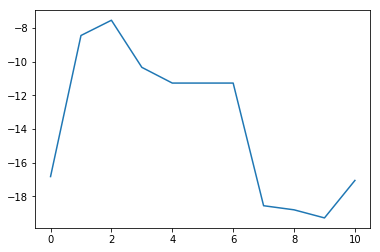

In [46]:
plt.plot(profits);

In [47]:
n = np.argmax(profits)
max_profits = profits[n]
optim_feats = feat[n]

In [48]:
print(max_profits)
print(optim_feats)

-7.531687000000051
['fqtr_2' 'totdebt_invcapq' 'cf_yield' 'dpq' 'evmq' 'lt_debtq'
 'cash_conversionq' 'prccq' 'oepsxy' 'efftaxq']


### We restrict the traing set to the optimal features and retrain the tree on the reduces data set

In [49]:
train_1_optim = train_1[optim_feats]
valid_optim = valid[optim_feats]

t_clf.fit(train_1_optim,y_1)
pred_valid_tree = t_clf.predict(valid_optim)
(pred_valid_tree * df_valid['next_period_return']).sum()

-7.531687000000051

## How well does it do on the test set?

In [50]:
train_2_tree = train_2[optim_feats]
test_tree = test[optim_feats]
t_clf.fit(train_2_tree,y_2)
pred_test_tree = t_clf.predict(test_tree)
(pred_test_tree * df_test['next_period_return']).sum()

32.549593999999956

## If we were 100% correct on the validation set we would get this profit

In [51]:
(y_valid * df_valid['pred_rel_return']).sum()

168.00035799999995

## A totally random strategy where we randomly decide whether to buy or sell

In [52]:
m = len(df_test['next_period_return'])

In [53]:
random_predictions = []
for _ in range(1000):
    pred_random = np.random.choice([-1,0,1],m)
    random_predictions.append((pred_random * df_test['next_period_return']).sum())
    

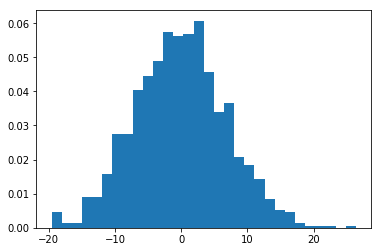

In [54]:
plt.hist(random_predictions,bins=30,density=True);

In [55]:
np.mean(random_predictions)

-0.08535409100000006

## Now we run this strategy over the whole period and see how it performs

In [56]:
start_dates = [pd.to_datetime('2000-01-01') + pd.DateOffset(months = 3 * i) for i in range(62)]
end_dates = [d + pd.DateOffset(months = 36) for d in start_dates]

In [57]:
training_frames = [data.loc[d:d+pd.DateOffset(months=36)] for d in start_dates]
test_frames = [data.loc[d+pd.DateOffset(months=3):d+pd.DateOffset(months=6)] for d in end_dates]

In [58]:
training_data = [d.reset_index().drop
                                 (['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in training_frames]

In [59]:
test_data = [d.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in test_frames]

In [60]:
training_labels = [d['rel_performance'].values for d in training_frames]

In [61]:
opt_training_data = [t[optim_feats] for t in training_data]
opt_test_data = [v[optim_feats] for v in test_data]

In [62]:
P_L = []
x = [1]
ret = []

for i in range(len(training_labels)-1):
        t_clf.fit(opt_training_data[i],training_labels[i])
        pred_i = t_clf.predict(opt_test_data[i])
        profit_i = (pred_i * test_frames[i]['next_period_return']).sum()
        P_L.append(profit_i)
        num_positions = len(pred_i)
        ret.append((1.0/num_positions) * profit_i)
        x.append(x[i] + (x[i]/num_positions) * profit_i)

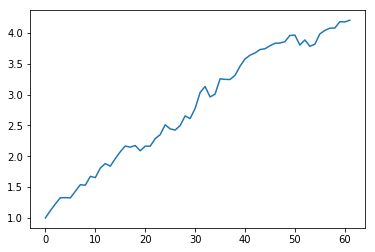

In [63]:
plt.plot(x);

## Compared to a buy-and-hold of SPY

In [65]:
SPY = pd.read_pickle("SPY_cum_ret.pkl")
SPY = SPY.loc['2003-04-01':'2018-09-30']
SPY = SPY.resample('Q').ffill()
SPY['spy_cum_ret'] = (SPY['spy_cum_ret'] - SPY['spy_cum_ret'][0] + 1)
SPY['strategy'] = x

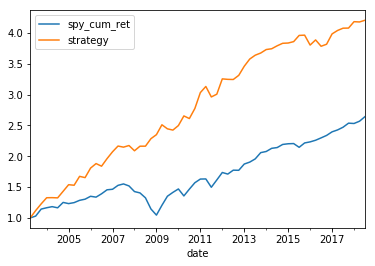

In [66]:
SPY.plot();

In [67]:
strategy_mean_ret = (SPY['strategy'] - 1).diff().mean()
strategy_std = (SPY['strategy'] - 1).diff().std()
print('Strategy Sharpe Ratio: ',strategy_mean_ret/strategy_std)

Strategy Sharpe Ratio:  0.6280210382206696


In [68]:
spy_mean_ret = (SPY['spy_cum_ret'] - 1).diff().mean()
spy_std = (SPY['spy_cum_ret'] - 1).diff().std()
print('SPY Sharpe Ratio: ',spy_mean_ret/spy_std)

SPY Sharpe Ratio:  0.4100834330712901


### Total Returns

In [69]:
x[-1]

4.203830839950481

In [70]:
SPY['spy_cum_ret'][-1]

2.64168

### Computing the (quarterly) $\alpha$ of the strategy

In [71]:
strategy_ret = (SPY['strategy'] - 1).diff().values[1:]
spy_ret = (SPY['spy_cum_ret'] - 1).diff().values[1:]

In [72]:
beta = (np.cov(spy_ret,strategy_ret)/np.var(spy_ret))[1,0]
beta

0.24108482877364265

In [73]:
residual_ret = strategy_ret - beta * spy_ret
IR = np.mean(residual_ret)/np.std(residual_ret)
IR

0.5648702030528907

In [74]:
alpha = np.mean(residual_ret)
alpha

0.04603355243031749